In [1]:
#Importing librarues
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Setup the column and row value display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# Reading the Data Set
data = pd.read_csv('loan.csv',low_memory=False)

In [9]:
# Displaying the top 5 rows
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
#Checking the data set shape
data.shape

(39717, 111)

In [11]:
# Statistical data 
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [12]:
# Summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [13]:
#Checking the null values
data.isna().sum().sort_values(ascending = False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [14]:
# Dropping the All the columns which contains all null values
# removing the columns having more than 90% missing values
# missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 90]
# print(missing_columns)
data = data.dropna(axis=1,how='all')

In [17]:
data.shape

(39717, 57)

In [18]:
data.isna().sum().sort_values(ascending = False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [4]:
# d_c = data.select_dtypes(include = ["object"])
# d_n = data.select_dtypes(include=["number"])

In [20]:
#removing the columns which has more than 90% null values
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent
data = data.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [23]:
data.isna().sum().sort_values(ascending = False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
total_pymnt                      0
total_pymnt_inv                  0
collection_recovery_fee          0
total_rec_int                    0
total_rec_late_fee               0
recoveries                       0
pub_rec                          0
last_pymnt_amnt                  0
policy_code                      0
application_type                 0
acc_now_delinq                   0
delinq_amnt                      0
revol_bal                        0
id                  

In [26]:
# missing values in rows
data.isnull().sum(axis=1).sort_values(ascending  =False)

39706    5
39715    5
39714    5
39660    5
39659    5
39700    5
39704    5
39682    4
39690    4
39689    4
39688    4
39687    4
39686    4
39685    4
39716    4
39642    4
39693    4
39676    4
39674    4
39650    4
39672    4
39671    4
39691    4
39692    4
39694    4
39708    4
39705    4
39709    4
39710    4
39711    4
39703    4
39712    4
39713    4
39702    4
39701    4
39699    4
39698    4
39697    4
39696    4
39695    4
39707    4
28700    3
14839    3
28980    3
39629    3
24984    3
16719    3
4714     3
39476    3
11282    3
28547    3
32545    3
39670    3
39679    3
39675    3
39681    3
39673    3
39683    3
39677    3
39669    3
39684    3
39667    3
39678    3
39668    3
21229    2
21521    2
21277    2
21283    2
21125    2
21296    2
21159    2
21365    2
20110    2
21404    2
21453    2
20165    2
21589    2
21523    2
21566    2
21077    2
21615    2
21654    2
21669    2
21711    2
1827     2
1826     2
21732    2
21862    2
21901    2
21103    2
21019    2

In [30]:
# checking whether some rows have more than 10 missing values
len(data[data.isnull().sum(axis=1) > 10].index)

0

In [31]:
#Checking the updated data size
data.shape

(39717, 53)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [40]:
dt.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Data Analysis
#### In the above loan data we can customer data and loan data before approving the loan and  data after getting the loann amount
##### <font color='Blue'> we required loan data before loan credit  and customer data for our further analysis </font>
- customer data (age salary, employeement type)
- loand details( Loan amount, interest rate)
- Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. we are removing the all the variables.

- Thus, going forward, we will use only the other two types of variables.

In [37]:
useless_data =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
useless_data

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [35]:
data = data.drop(useless_data,axis = 1)

In [36]:
data.shape

(39717, 32)

In [39]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
data = data.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

- Typically, variables such as acc_now_delinquent, chargeoff within 12 months etc. (which are related to the applicant's past loans) are available from the credit bureau. 
- Id and member-id not useful for predicting the customer default or not but it can be useful for after prediction whcih customer was defaulted or which customer was not
- collections_12_mths_ex_med & chargeoff_within_12_mths & tax_liens has only 2 values it has 0 and nan, it will also not useful for further analysis
- acc_now_delinq & delinq_amnt It has also only one value "0"
- policy_code has only one variable "1"

In [40]:
data = data.drop(['id','member_id','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code'],axis=1)

In [41]:
# Final data 
data.shape

(39717, 20)

In [ ]:
#dt['issue_d'] = pd.to_datetime(dt['issue_d'])
#da['Year'] = pd.DatetimeIndex(dt['issue_d']).year
#dt['year'] = dt['issue_d'].str.split('-').str[1]
#dt['year'].value_counts()
#dt = dt.drop(['year'], axis=1)

In [46]:
# Converting issue_data to datatime format
data['issue_d']= pd.to_datetime(data['issue_d'], format='%b-%y')
#.dt.strftime('%m_%Y')

In [43]:
# from datetime import datetime
# data['issue_d'] = data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [50]:
data['month'] = data['issue_d'].dt.month
data['year'] = data['issue_d'].dt.year

In [52]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,pub_rec_bankruptcies,month,year
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,27.65,f,0.0,12,2011
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,1.00,f,0.0,12,2011
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,8.72,f,0.0,12,2011
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,20.00,f,0.0,12,2011
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,17.94,f,0.0,12,2011


In [54]:
data['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

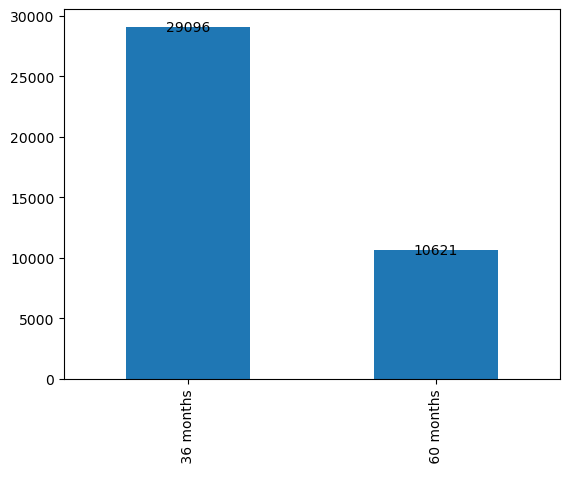

In [55]:
ax = data['term'].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Display the plot
plt.show()

In [57]:
dt = data

### Why peoples are choosing loan
#### Below are the main reasons to apply loan
- debt_consolidation
- credit card
- home improvement

In [58]:
# sns.countplot(y = dt['purpose'], orient="v")
# plt.show()
# ---------
# ax = dt['purpose'].value_counts().plot.bar()
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# # Display the plot
# plt.show()

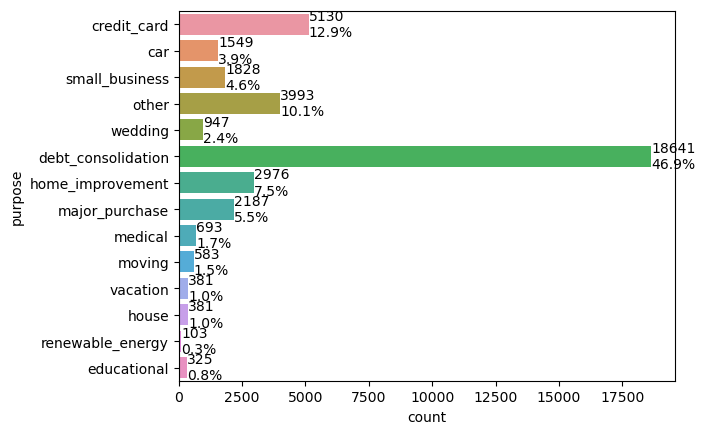

In [59]:
# Create a count plot
ax = sns.countplot(y=dt['purpose'], orient="v")

# Annotate bars with both counts and percentages
total_records = len(dt)
for p in ax.patches:
    count = p.get_width()
    percentage = (count / total_records) * 100
    ax.annotate(f'{count}\n{percentage:.1f}%', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center')

# Display the plot
plt.show()

In [60]:
dt['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [96]:
# Calculate value counts
value_counts = data['purpose'].value_counts()

# Calculate percentages
total_counts = len(data)
percentages = (value_counts / total_counts) * 100

# Calculate value counts for 'purpose' where loan_status is 'Charged Off'
default_count = data.loc[data['loan_status'] == 'Charged Off', 'purpose'].value_counts()

# Calculate total number of 'Charged Off' records
total_default_records = len(data[data['loan_status'] == 'Charged Off'])

# Calculate default percentages based on total 'Charged Off' records
default_percentages = (default_count / total_default_records) * 100

# Calculate default percentages based on total 'Charged Off' records
total_default_percentages = (default_count / total_counts) * 100 

# Create a DataFrame combining all the calculated values
result = pd.DataFrame({'Counts': value_counts, 'Percentages': percentages,
                       'Default Count': default_count, 'Def Per': default_percentages,
                      'To Def Per':total_default_percentages})

# Sort the DataFrame by Counts in descending order
result = result.sort_values(by='Counts', ascending=False)

# Display the combined and sorted result
print('percentage: percentage of each values in purpose')
print('Def per: default loan percentage')
print('To Def per: default loan percentage in entire value count')
print('\n')
print(result)

percentage: percentage of each values in purpose
Def per: default loan percentage
To Def per: default loan percentage in entire value count


                    Counts  Percentages  Default Count    Def Per  To Def Per
debt_consolidation   18641    46.934562           2767  49.173627    6.966790
credit_card           5130    12.916383            542   9.632131    1.364655
other                 3993    10.053629            633  11.249334    1.593776
home_improvement      2976     7.493013            347   6.166696    0.873681
major_purchase        2187     5.506458            222   3.945264    0.558955
small_business        1828     4.602563            475   8.441443    1.195961
car                   1549     3.900093            160   2.843433    0.402850
wedding                947     2.384369             96   1.706060    0.241710
medical                693     1.744845            106   1.883775    0.266888
moving                 583     1.467885             92   1.634974    0.231639


In [65]:
# filtering only fully paid or charged-off
dt = dt[dt['loan_status'] != 'Current']
dt['loan_status'] = dt['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
dt['loan_status'] = dt['loan_status'].astype('int')

# summarising the values
dt['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [ ]:
dt['int_rate'] = dt['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [200]:
# first, let's drop the missing values from the column (otherwise the regex code below throws error)
dt = dt[~dt['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
dt['emp_length'] = dt['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
#dt['emp_length'] = dt['emp_length'].apply(lambda x: pd.to_numeric(x))
dt['emp_length'] = dt['emp_length'].astype('int')

In [68]:
dt.var()

loan_amnt               5.399959e+07
funded_amnt             5.027244e+07
funded_amnt_inv         4.931861e+07
installment             4.353032e+04
annual_inc              4.124039e+09
loan_status             1.245910e-01
dti                     4.452952e+01
pub_rec_bankruptcies    4.185405e-02
month                   1.161803e+01
year                    7.790843e-01
dtype: float64

In [201]:
dt.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,pub_rec_bankruptcies,month,year
loan_amnt,1.000000,0.981603,0.936871,0.299237,0.931686,0.148267,0.266282,0.062680,0.061402,-0.031758,0.052812,0.115074
funded_amnt,0.981603,1.000000,0.955300,0.302955,0.957721,0.147930,0.261959,0.059535,0.061251,-0.032708,0.042576,0.126093
funded_amnt_inv,0.936871,0.955300,1.000000,0.295697,0.904110,0.158852,0.249320,0.040097,0.070007,-0.037598,0.069273,0.259073
int_rate,0.299237,0.302955,0.295697,1.000000,0.274791,-0.000602,0.046092,0.213497,0.112188,0.082988,0.026176,0.044083
installment,0.931686,0.957721,0.904110,0.274791,1.000000,0.121101,0.264684,0.029868,0.050727,-0.029352,0.029796,0.057550
emp_length,0.148267,0.147930,0.158852,-0.000602,0.121101,1.000000,0.111107,0.016656,0.048619,0.063212,0.022054,0.115340
annual_inc,0.266282,0.261959,0.249320,0.046092,0.264684,0.111107,1.000000,-0.038501,-0.123582,-0.012378,0.009557,0.012689
loan_status,0.062680,0.059535,0.040097,0.213497,0.029868,0.016656,-0.038501,1.000000,0.042803,0.045625,0.025811,0.022816
dti,0.061402,0.061251,0.070007,0.112188,0.050727,0.048619,-0.123582,0.042803,1.000000,0.006733,0.012125,0.094332
pub_rec_bankruptcies,-0.031758,-0.032708,-0.037598,0.082988,-0.029352,0.063212,-0.012378,0.045625,0.006733,1.000000,-0.022183,-0.002942


<AxesSubplot:>

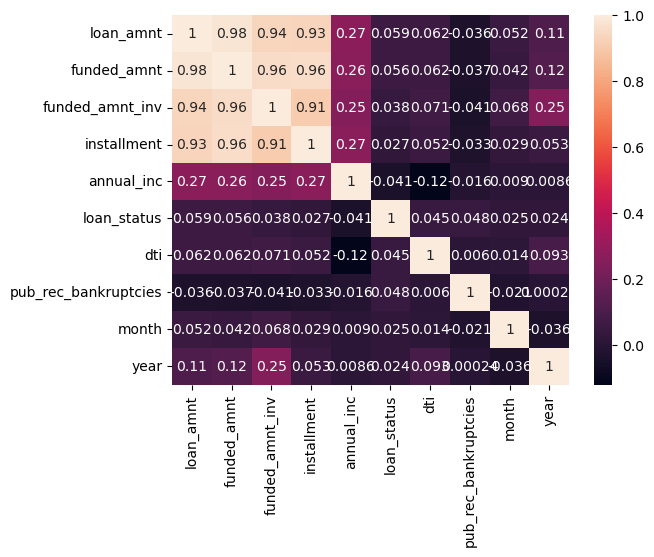

In [73]:
sns.heatmap(dt.corr(), annot = True)

In [82]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  object        
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_title             36191 non-null  object        
 9   emp_length            37544 non-null  object        
 10  home_ownership        38577 non-null  object        
 11  annual_inc            38577 non-null  float64       
 12  verification_status   38577 non-null  object        
 13  issue_d         

##### <font color='Green'>Here loan status is the target variable, So that we can decide which customer will be default or not , we can analysis the loan status with other variables</font>

In [124]:
# default rate
round(np.mean(dt['loan_status']),5)

0.14586

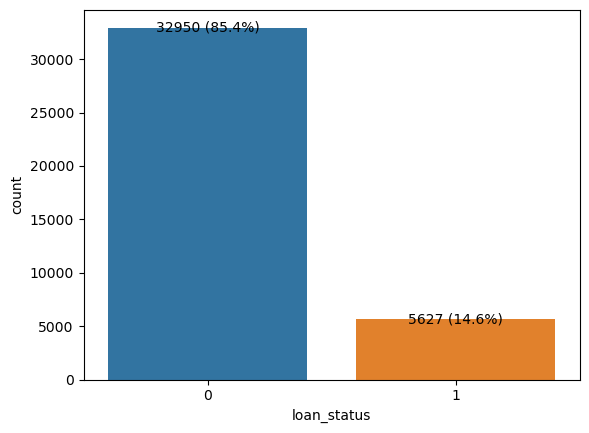

In [101]:
# we can clealy identify 14.6% defaulters are there in data
var = sns.countplot(data=dt, x='loan_status')

total = len(dt['loan_status'])
for p in var.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    var.annotate(f'{p.get_height()} ({percentage})', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center')

plt.show()

Most of the peoples are interest to take  E,F,G grade loans

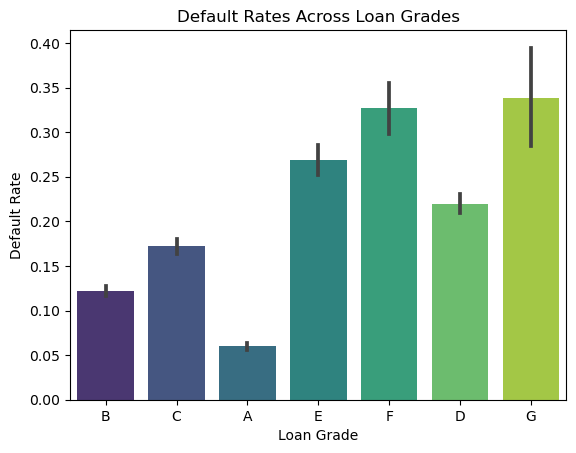

In [78]:
sns.barplot(x='grade', y='loan_status', data=dt, palette='viridis')
plt.title('Default Rates Across Loan Grades')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.show()

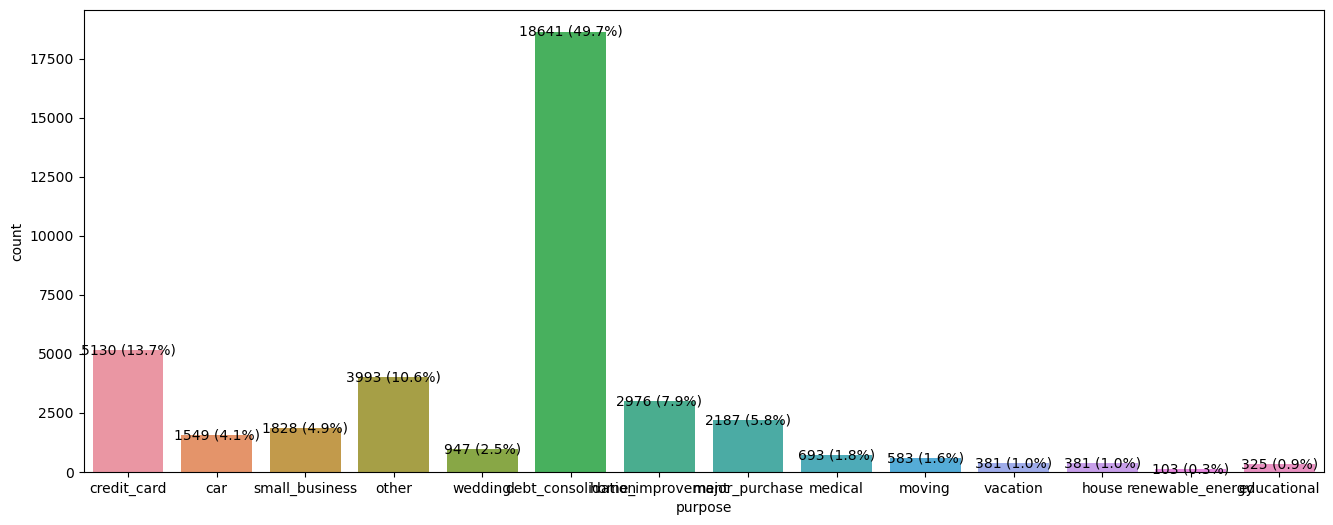

In [243]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
var = sns.countplot(x='purpose', data=data)
total = len(dt['purpose'])
for p in var.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    var.annotate(f'{p.get_height()} ({percentage})', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center')
plt.show()


In [168]:
# lets define a function to plot loan_status across categorical variables
# for p in var.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height() / total)
#         var.annotate(f'{p.get_height()} ({percentage})', 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha='center', va='center')
def plot_cat(cat_var):
    var = sns.barplot(x=cat_var, y='loan_status', data=dt)
    total = dt[cat_var].count()
    for p in var.patches:
        var.annotate(f'{round(p.get_height(),4)}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='left', va='center')
    plt.show()

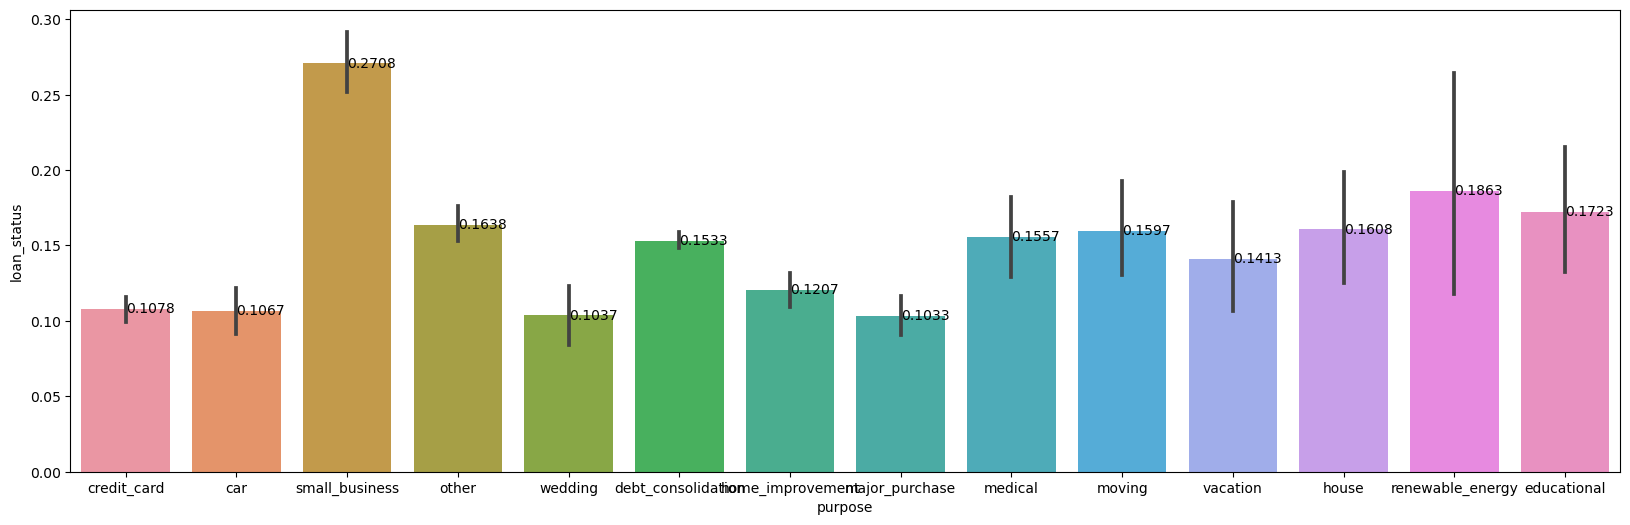

In [169]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(20, 6))
plot_cat('purpose')

In [ ]:
round(np.mean(dt.loc[dt['purpose '] == 'small_business','loan_status']),5)
new_l = dt['purpose'].unique()
for i in new_l:
    mean_loan_status = np.mean(dt.loc[dt['purpose'] == i, 'loan_status'])
    rounded_mean = round(mean_loan_status, 5)
    print(i,":",rounded_mean)

In [177]:
mean_loan_status = np.mean(dt.loc[dt['purpose'] == 'small_business', 'loan_status'])
rounded_mean = round(mean_loan_status, 5)
print(i,":",rounded_mean)

emp_title : 0.27081


In [181]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [179]:
np.mean(dt['loan_status'])

0.14586411592399617

In [160]:
new_l = dt['purpose'].unique()

# Create a list to store tuples (purpose, rounded_mean)
mean_values = []

for i in new_l:
    mean_loan_status = np.mean(dt.loc[dt['purpose'] == i, 'loan_status'])
    rounded_mean = round(mean_loan_status, 5)
    mean_values.append((i, rounded_mean))

# Sort the list of tuples based on the rounded mean (second element)
sorted_mean_values = sorted(mean_values, key=lambda x: x[1])
sorted_mean_values.reverse()

# Print the sorted values
for purpose, rounded_mean in sorted_mean_values:
    print(purpose, ":", rounded_mean)


small_business : 0.27081
renewable_energy : 0.18627
educational : 0.17231
other : 0.16378
house : 0.16076
moving : 0.15972
medical : 0.15565
debt_consolidation : 0.15325
vacation : 0.14133
home_improvement : 0.1207
credit_card : 0.10782
car : 0.10674
wedding : 0.10367
major_purchase : 0.10326


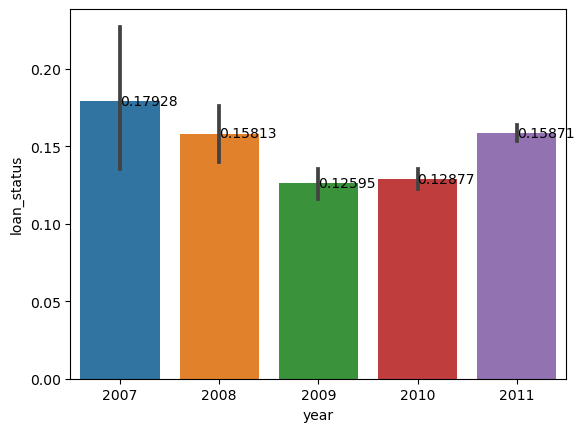

In [162]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_cat('year')

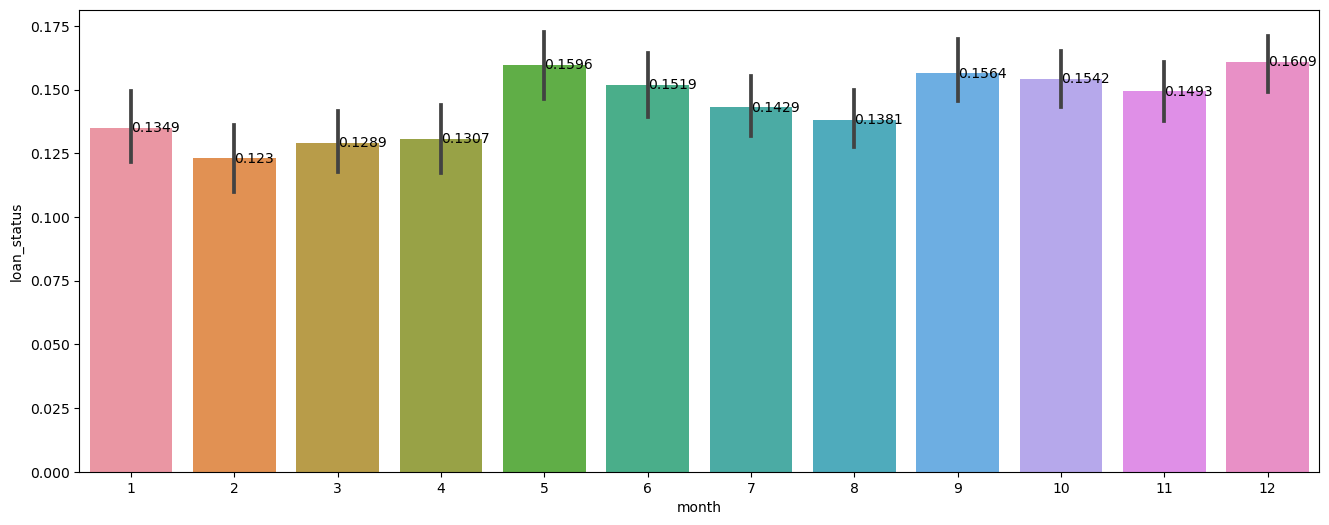

In [171]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
plot_cat('month')

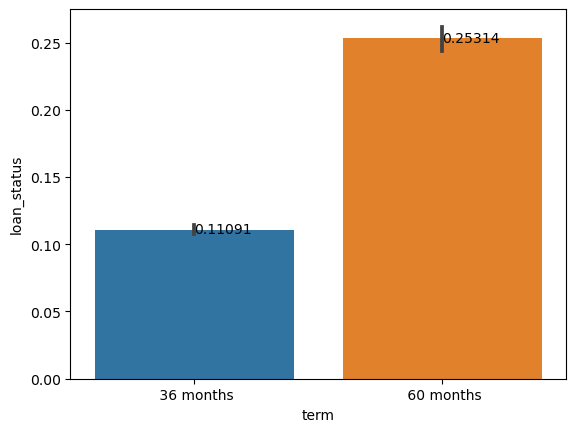

In [163]:
#Most of the loan defaulted when they are in 60 months terms
plot_cat('term')

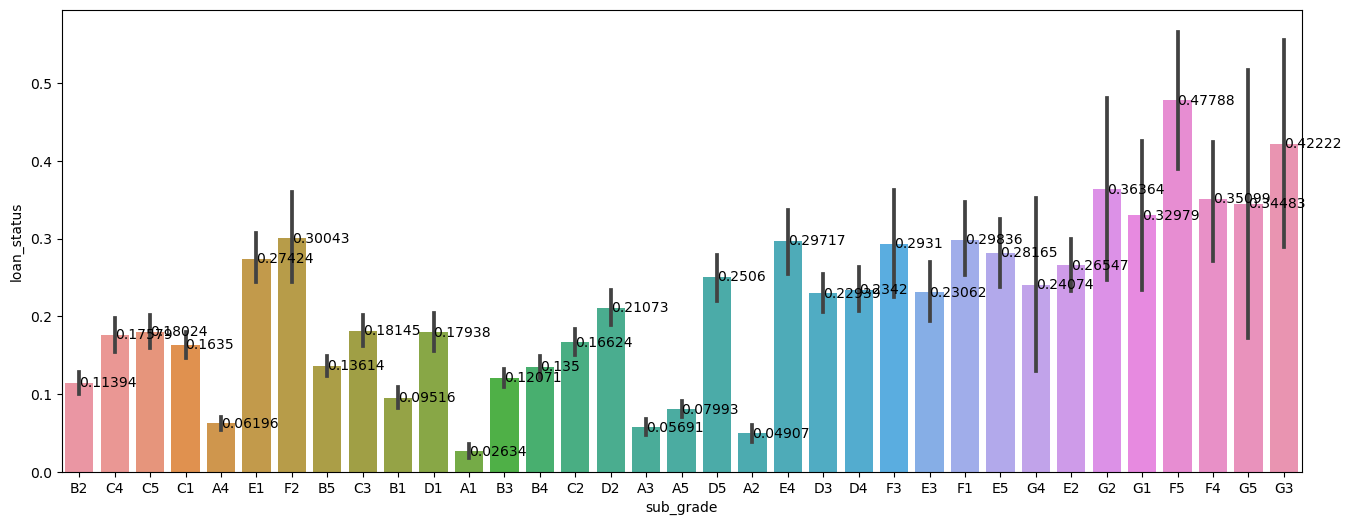

In [164]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

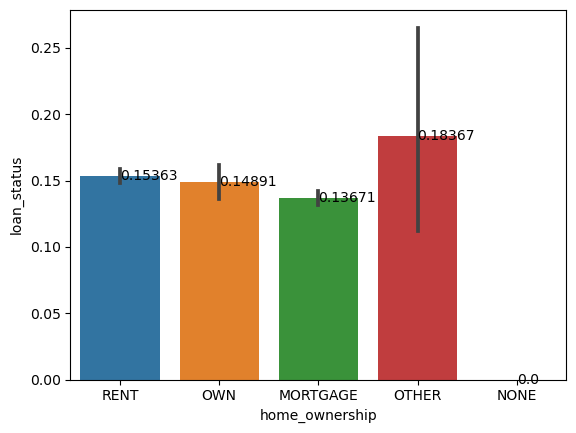

In [165]:
# home ownership: not a great discriminator why because there is no distribution b/w home_ownwership
plot_cat('home_ownership')

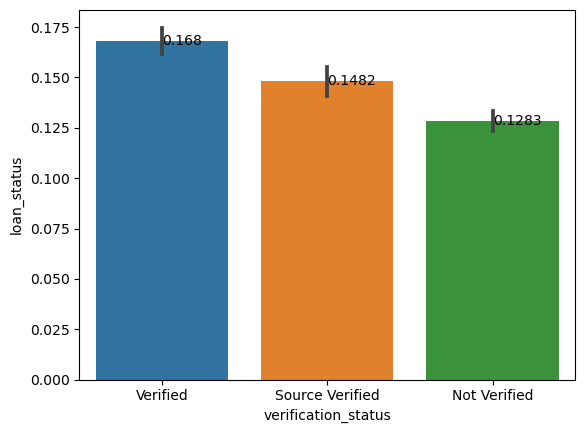

In [170]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_cat('verification_status')

In [ ]:
# def plot_cat(cat_var):
#     var = sns.barplot(x=cat_var, y='loan_status', data=dt)
#     total = dt[cat_var].count()
#     for p in var.patches:
#         var.annotate(f'{round(p.get_height(),4)}', 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha='left', va='center')
# d_c = dt.select_dtypes(include = ["object"]).columns
# for i in d_c:
#     plot_cat(i)
# plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

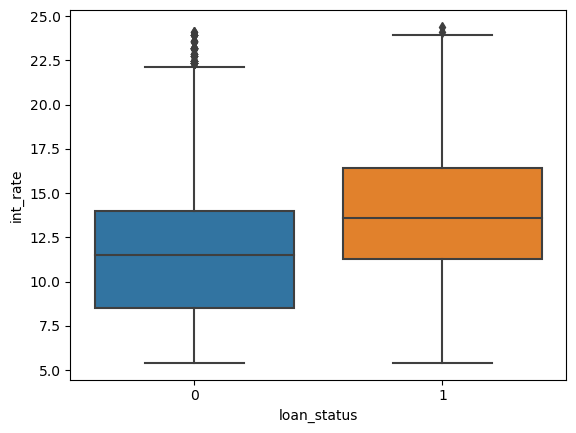

In [198]:
#Analyze the relationship between loan status and int_rate
# Here clearely we can identify customers mostly defaulted which has higher  interest rate for loans
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=dt)

In [184]:
dt['dti'].value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
12.48     37
16.80     37
15.00     36
6.00      36
13.50     36
14.29     35
21.60     34
4.80      33
20.40     33
17.04     33
12.86     32
12.50     32
15.60     32
11.50     31
14.44     31
10.64     31
14.97     31
14.76     31
6.76      31
8.88      31
12.69     31
9.60      31
8.40      31
15.63     30
14.40     30
17.40     30
7.80      30
10.00     30
9.17      30
10.03     30
10.80     29
18.72     29
16.32     29
15.84     29
10.16     29
9.00      29
13.28     29
16.77     29
15.31     28
12.62     28
12.96     28
10.20     28
13.10     28
14.73     28
7.00      28
14.36     28
15.55     28
20.69     28
15.14     27
15.86     27
13.65     27
16.56     27
14.74     27
16.95     27
13.75     27
18.14     27
16.20     27
11.35     27
15.38     27
13.51     27
6.65      27
14.33     27
22.43     27
9.48      27
13.68     27
9.81      26
10.28     26
10.90     26
10.08     26
13.71     26
14.08     26
18.60     26

<AxesSubplot:xlabel='loan_status', ylabel='emp_length'>

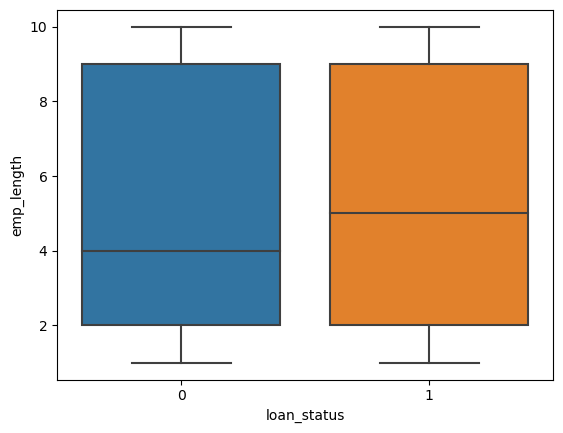

In [202]:
# if we check the boxplot most of the non defaulted customers which has less than 4 or 4 years experience
sns.boxplot(x = 'loan_status', y = 'emp_length' ,data=dt)

In [204]:
dt.emp_length.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [205]:
before_4 = dt[dt['emp_length'] < 4]['emp_length'].count()
after_4 = dt[dt['emp_length'] >= 4]['emp_length'].count()

In [206]:
print(before_4)
print(after_4)

15980
21564


<AxesSubplot:xlabel='emp_length', ylabel='Density'>

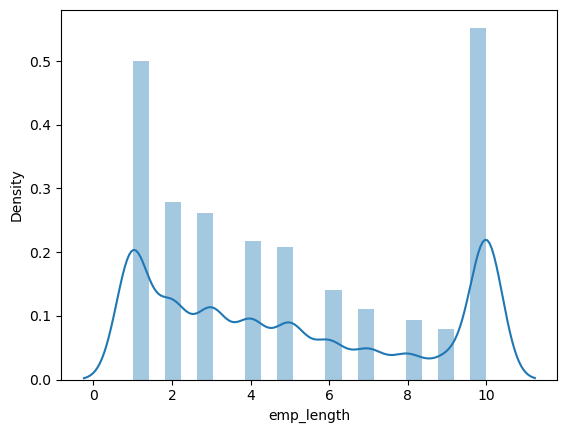

In [211]:
# when we check distplot we do not have any relation with emp length
sns.distplot(dt['emp_length'])

In [213]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37544 non-null  int64         
 1   funded_amnt           37544 non-null  int64         
 2   funded_amnt_inv       37544 non-null  float64       
 3   term                  37544 non-null  object        
 4   int_rate              37544 non-null  float64       
 5   installment           37544 non-null  float64       
 6   grade                 37544 non-null  object        
 7   sub_grade             37544 non-null  object        
 8   emp_title             36136 non-null  object        
 9   emp_length            37544 non-null  int32         
 10  home_ownership        37544 non-null  object        
 11  annual_inc            37544 non-null  float64       
 12  verification_status   37544 non-null  object        
 13  issue_d         

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

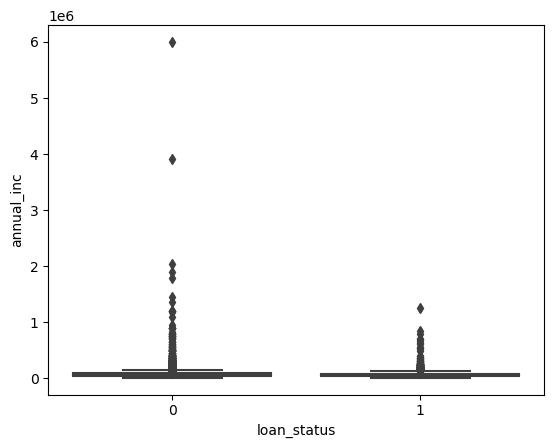

In [215]:
#Claery we can see outliers here
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=dt)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

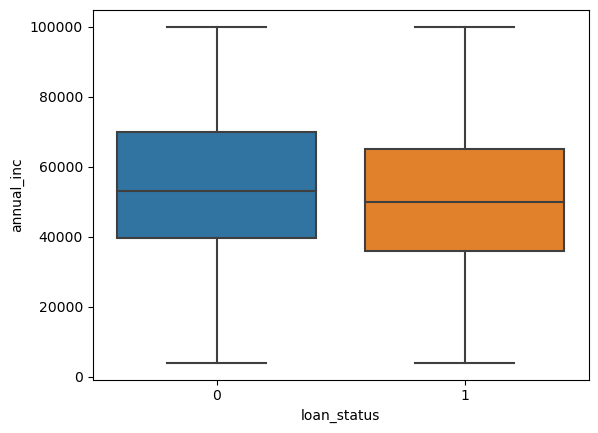

In [217]:
temp = dt[dt['annual_inc'] < 100000]
#Analyze the relationship between loan status and salary
#Defaulters salary is less than not defaulters salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=temp)

<AxesSubplot:xlabel='loan_amnt', ylabel='int_rate'>

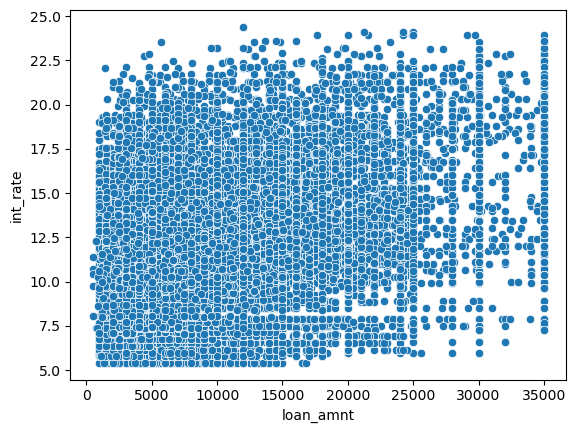

In [220]:
#we do not have any relation b/w loan_amnt and int_rate
sns.scatterplot(dt['loan_amnt'],dt['int_rate'])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

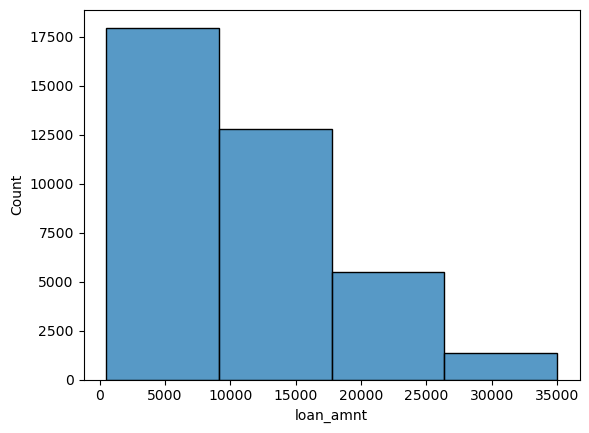

In [224]:
# most of the people taking loans b/w 5000_15000
sns.histplot(dt['loan_amnt'],bins = 4)

In [226]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
dt['loan_amnt-new'] = dt['loan_amnt'].apply(lambda x: loan_amount(x))

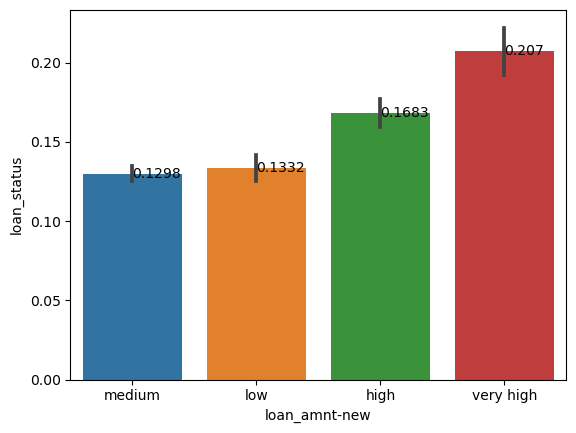

In [227]:
#we can clearly see here most of the customers defaulted when thay hav higher amount of loan
plot_cat('loan_amnt-new')

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

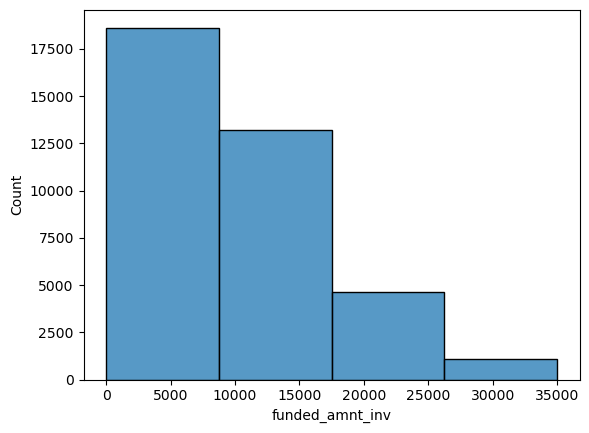

In [228]:
# most of the people having funded_amnt b/w 5000_15000
sns.histplot(dt['funded_amnt_inv'],bins = 4)

In [229]:
dt['funded_amnt_inv_new'] = dt['funded_amnt_inv'].apply(lambda x: loan_amount(x))

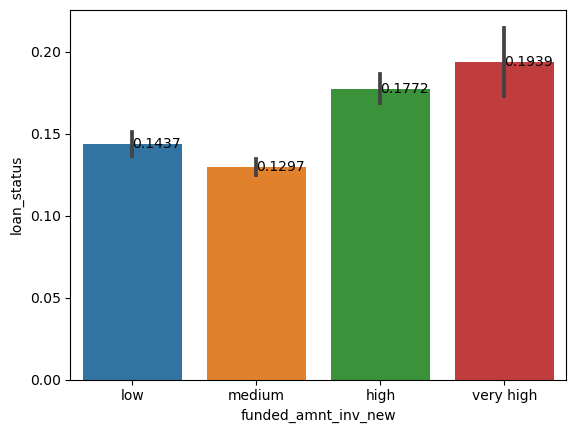

In [230]:
#we can clearly see here most of the customers defaulted when thay hav higher amount of funded_amt_inv
plot_cat('funded_amnt_inv_new')

In [232]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

dt['dti'] = dt['dti'].apply(lambda x: dti(x))

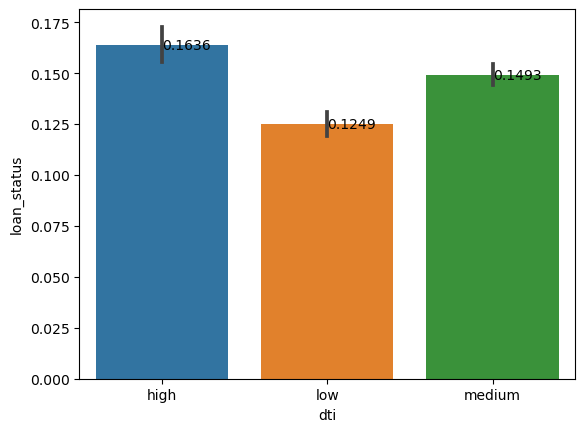

In [233]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plot_cat('dti')

In [235]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
dt['installment'] = dt['installment'].apply(lambda x: installment(x))

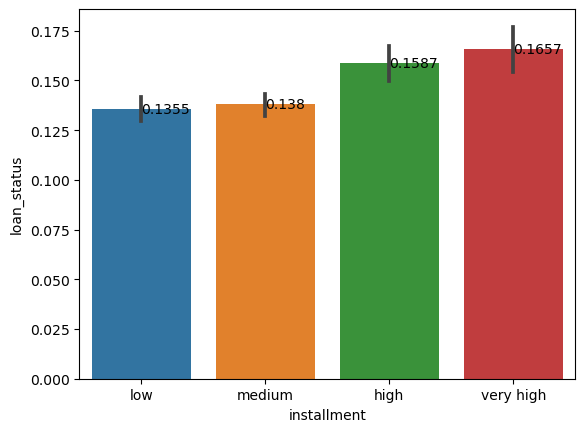

In [236]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

In [238]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

dt['annual_inc'] = dt['annual_inc'].apply(lambda x: annual_income(x))

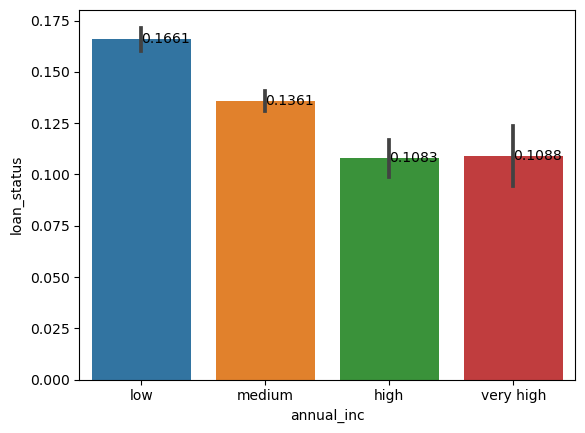

In [239]:
# annual income and default rate
# lower the annual income, higher the default rate
plot_cat('annual_inc')